In [1]:
import sys
sys.path.append("/Users/arpiharutyunyan/.pyenv/versions/3.10.2/lib/python3.10/site-packages")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind, ttest_rel, f_oneway, kstest, shapiro, wilcoxon
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.stats.proportion as proportion

##### Some useful and easy to digest materials
- https://www.youtube.com/watch?v=rulIUAN0U3w
- https://www.youtube.com/watch?v=QrYgXZf-Ay8
- https://www.youtube.com/watch?v=0zZYBALbZgg&t=16s
- https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
- https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

- ***Parametric tests*** are used if the data is normally distributed. A parametric statistical test makes an assumption about the population parameters and the distributions that the data came from. These types of test includes t-tests,z-tests and anova tests, which assume data is from normal distribution.


- ***Non parametric tests***  are used when data is not normally distributed. Non parametric tests include chi-square test, Wilcoxon Rank Sum Test, etc.

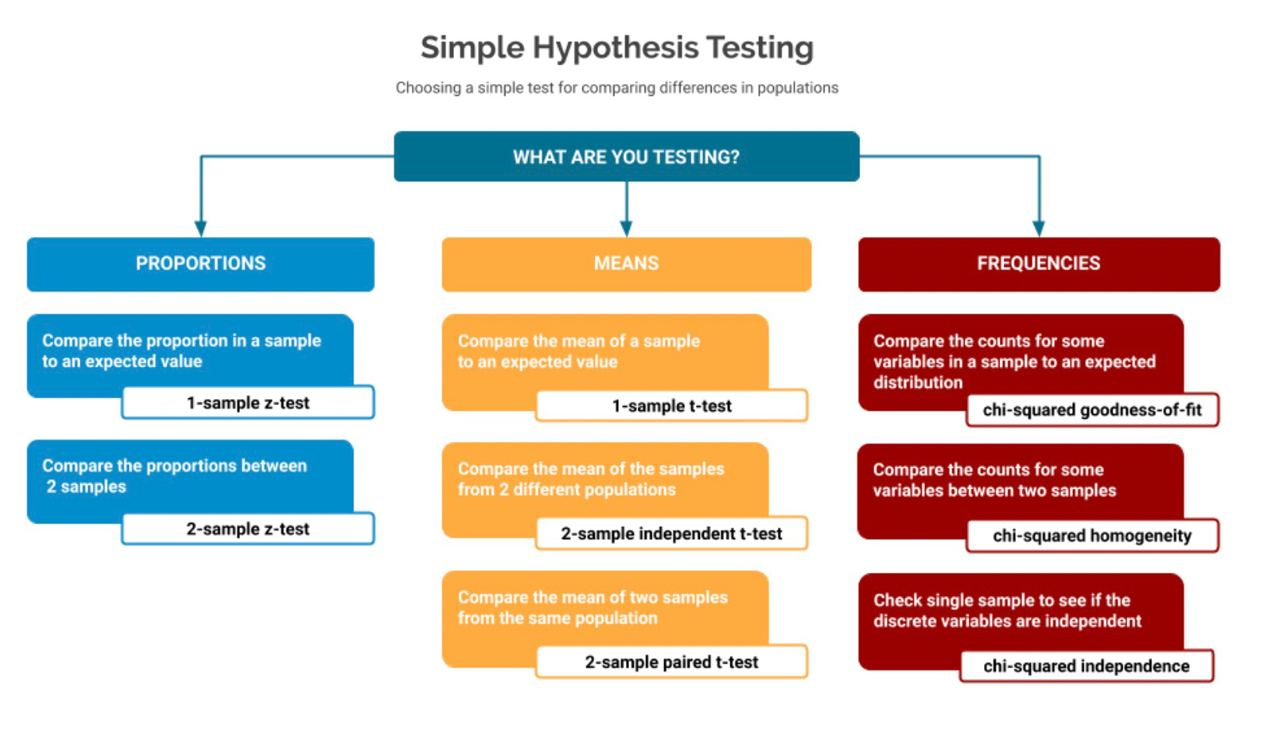

In [62]:
Image('screenshots/2.jpg',width=550, height=550)

**Distribution tests**
- Normality tests 
     - Kolmogorov-Smirnov test
     - Shapiro-Wilk Test 
     - D’Agostino’s K^2 Test 

**For comparing means**
- 1-sample z-test for mean
- 2-sample z-test for mean
- 1-sample t-test for mean 
- 2-sample independent t-test for mean (Student's test)
- paired t-test for mean (Student's test)
- one-way ANNOVA
- two-way ANNOVA
                        
**For comparing proportions**
- 1-sample z-test for proportion
- 1-sample t-test for proportion
- 2-sample t-test for proportion
- Chi-square test for independence (Pearson's chi-square)
- Fisher's exact test
                                  
**For finding relationship**
- Pearson's correlation test
- Regression Analysis
                  
**For comparing medians**
- Wilcoxon Rank test

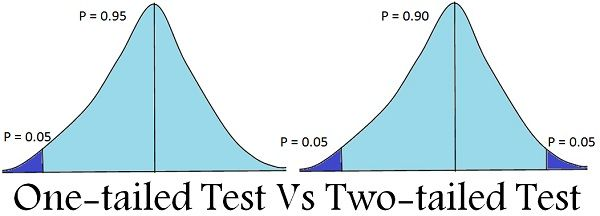

In [61]:
Image('screenshots/5.jpeg',width=550, height=550)

One-tailed tests allow for the possibility of an effect in one direction. Two-tailed tests test for the possibility of an effect in two directions—positive and negative.

- One-Tail Test Example:
    - H0: Mean of the sampled population = 40
    - Ha: Mean of the sampled population != 40
    

- Two-Tail Test Example:
    - H0: Mean of the sampled population >= 40
    - Ha: Mean of the sampled population < 40

# Z - test

When to use:
- Sample size is greater than 30. Otherwise, use a t test. 
- We know the population variance σ or do not know the population variance but our sample size is large, n≥30 n ≥ 30
- Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.
- Your data should be randomly selected from a population, where each item has an equal chance of being selected. (iid)
- Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.
- Sample sizes should be equal if at all possible.

### One Sample Z-Test for mean

It tests whether the sample mean is significantly different (greater than, less than or not equal) than a population mean when the population's standard deviation is known.

- Ho: Sample mean is same as the population mean(Null hypothesis)
- Ha: Sample mean is not same as the population mean(Alternate hypothesis)

**Summary**
- Dependent variable: numerical
- Independent variable: categorical
- Sample: 1 - sample
- Purpose: compare

z = (x — μ) / (σ / √n),

where 
x - sample mean
u - population mean
σ - population standard deviation
n - sample size

If population standard deviation is not known but n>30, sigma can be approximated by standard deviation of the sample.
Python z-test function, however, takes n-1 instead of n.

If z value is less than critical value accept null hypothesis else reject null hypothesis.

In [4]:
def one_sample_z_test(sample, population_mean, tail = 'two', alpha = 0.05):
    z_score, pi_value = ztest(data, value = population_mean) 
    
    # manual calculations
    x_bar = np.mean(sample)
    s = np.std(sample)
    n = len(sample)   
    my_z_score = (x_bar - population_mean)/(s/np.sqrt(n-1))
    my_pi_value = st.norm.cdf(min(-z_score, z_score))*2

    if z_score != my_z_score or pi_value != my_pi_value:
        print("Z-score or p-value calculation Error...")
            
    if tail == 'one':
        if x_bar > population_mean:
            H0 = 'Sample mean <= population mean'
            H1 = 'Sample mean > population mean'
        else:
            H0 = 'Sample mean >= population mean'
            H1 = 'Sample mean < population mean'
            
        pi_value = st.norm.cdf(min(-z_score, z_score))
        

    elif tail == 'two':
        H0 = 'Sample mean = population mean'
        H1 = 'Sample mean != population mean'
    
    
    print(f"H0 : {H0}")
    print(f"H1 : {H1}\n")
    
    print(f"""Hyphothesized population mean: {population_mean}
    Sample mean: {np.round(x_bar,2)}
    z-score: {np.round(z_score,5)}    
    p_value: {pi_value}    
    
    """)    
        
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

##### Examples
Suppose the IQ in a certain population is normally distributed with a mean of μ = 100 and 
standard deviation of σ = 15.
A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and records their IQ levels.


In [5]:
alpha = 0.05 
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 88, 92, 94, 94, 96, 103,
        105, 109, 109, 109, 110, 112, 112, 113, 114, 115, 118, 110, 113, 98, 97]
mu = 105
sigma = 15 # we won't use this. Instead, we'll use sample s approximation dividing by n-1

In [6]:
one_sample_z_test(sample = data, population_mean = 110, tail = 'two')

H0 : Sample mean = population mean
H1 : Sample mean != population mean

Hyphothesized population mean: 110
    Sample mean: 102.06
    z-score: -4.99221    
    p_value: 5.969218059833331e-07    
    
    
Rejecting null hyphotheses: Sample mean != population mean


In [7]:
one_sample_z_test(sample = data, population_mean = 120, tail = 'one')

H0 : Sample mean >= population mean
H1 : Sample mean < population mean

Hyphothesized population mean: 120
    Sample mean: 102.06
    z-score: -11.28321    
    p_value: 7.942355714050214e-30    
    
    
Rejecting null hyphotheses: Sample mean < population mean


### Two-Sample Z-Test for mean

The Two-Sample Z-test is used to compare the means of two samples to see if it is probable that they come from the same population. The null hypothesis is: the population means are equal.
We use Z-test, if the sample sizes are large (>30) or the population parameters (standard deviation) are known.


**Summary**
- Dependent variable: numerical
- Independent variable: categorical
- Sample: 2-sample
- Purpose: compare

In [8]:
def two_sample_z_test(A, B, alpha = 0.05):
    z_score, pi_value = ztest(A, B, value=0) 
#     value = A-B
    
    H0 = 'A mean = B mean'
    H1 = 'A mean != B mean'
    print(f"H0 : {H0}")
    print(f"H1 : {H1}\n")
    
    print(f"""
    A mean: {np.round(np.mean(A),2)}
    B mean: {np.round(np.mean(B),2)}
    z-score: {np.round(z_score,5)}    
    p_value: {pi_value}\n""")
    
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

##### Examples

In [9]:
A = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

B = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

In [10]:
two_sample_z_test(A, B)

H0 : A mean = B mean
H1 : A mean != B mean


    A mean: 100.65
    B mean: 108.8
    z-score: -1.99532    
    p_value: 0.046007596761332065

Rejecting null hyphotheses: A mean != B mean


# T - test

Student's t-test, in statistics, a method of testing hypotheses about the mean of a small sample drawn from a normally distributed population when the population standard deviation is unknown. 
In practive we always use t-test instead of z-test.

**Assumptions**
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

### One-sample t-test
The mean of a single group is compared with a given mean. For example-to check the increase and decrease in sales if the average sales is given.
- H0 : Sample mean is the same as the expected population mean
- H1 : Sample mean differs from population mean


**Summary**
- Dependent variable: numerical
- Independent variable: categorical
- Sample: 1-sample
- Purpose: compare

In [11]:
def one_sample_t_test(sample, population_mean, tail = 'two', alpha = 0.05):
    t_score, pi_value = st.ttest_1samp(a=sample, popmean= population_mean )
    
    # manual calculations
    x_bar = np.mean(sample)
    s = np.std(sample)
    n = len(sample) 
    dof = n-1 # degree of freedom
    # dof is number of pieces of information that can vary. If we have 1,2,x seq with the mean of 2, the x is fixed to be 3. Thus the dof is 2. 
    
    my_pi_value = st.t.cdf(min(-t_score, t_score), df = dof)  * 2
#     my_pi_score = st.t.sf(abs(t_score), df)*2 ## survival function

    my_t_score = (x_bar - population_mean)/ (s/np.sqrt(n-1))

    if t_score != my_t_score or pi_value != my_pi_value:
        print("T-score or p-value calculation Error...")
            
    if tail == 'one':
        if x_bar > population_mean:
            H0 = 'Sample mean <= population mean'
            H1 = 'Sample mean > population mean'
        else:
            H0 = 'Sample mean >= population mean'
            H1 = 'Sample mean < population mean'
            
        pi_value = pi_value/2
        

    elif tail == 'two':
        H0 = 'Sample mean = population mean'
        H1 = 'Sample mean != population mean'
    
    #Note that to find a two-tailed test p-value we simply multiply the p-value of the one-tailed p-value by two.
    print(f"H0 : {H0}")
    print(f"H1 : {H1}\n")
    
    print(f"""Hyphothesized population mean: {population_mean}
    Sample mean: {np.round(x_bar,2)}
    t-score: {np.round(t_score,5)}    
    p_value: {pi_value}    
    
    """)    
        
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

##### Examples

In [12]:
sample = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]

hyphothesized_population_mean = 17
one_sample_t_test(sample, population_mean = hyphothesized_population_mean, tail = 'one', alpha = 0.05)

H0 : Sample mean >= population mean
H1 : Sample mean < population mean

Hyphothesized population mean: 17
    Sample mean: 14.33
    t-score: -6.73939    
    p_value: 1.601258563166832e-05    
    
    
Rejecting null hyphotheses: Sample mean < population mean


In [13]:
sample = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]

hyphothesized_population_mean = 17
one_sample_t_test(sample, population_mean = hyphothesized_population_mean, tail = 'two', alpha = 0.05)

H0 : Sample mean = population mean
H1 : Sample mean != population mean

Hyphothesized population mean: 17
    Sample mean: 14.33
    t-score: -6.73939    
    p_value: 3.202517126333664e-05    
    
    
Rejecting null hyphotheses: Sample mean != population mean


In [14]:
hyphothesized_population_mean = 12
one_sample_t_test(sample, population_mean = hyphothesized_population_mean, tail = 'one', alpha = 0.05)

H0 : Sample mean <= population mean
H1 : Sample mean > population mean

Hyphothesized population mean: 12
    Sample mean: 14.33
    t-score: 5.89696    
    p_value: 5.178617914092131e-05    
    
    
Rejecting null hyphotheses: Sample mean > population mean


### Two-sample Independent (unpaired) t-test / Student's t-test

The independent t-test which is also called the two sample t-test or student’s t-test, is a statistical test that determines whether there is a statistically significant difference between the means in two unrelated groups.
For example comparing males/females in a population.



- H0: the means of the samples are equal.
- H1: the means of the samples are unequal.

**Summary**
- Dependent variable: numerical
- Independent variable: categorical
- Sample: 2-sample
- Purpose: compare

In [15]:
def two_sample_ind_t_test(data1, data2, tail = "two",  alpha = 0.05):    
    x_bar1 = np.mean(data1)
    x_bar2 = np.mean(data2)
    st1 = np.std(data1)
    st2 = np.std(data2)
    n1 = len(data1)
    n2 = len(data2)
    df = n1 + n2 - 2
    
    variance_ratio = max(st1**2, st2**2)/min(st1**2,st2**2)
    if variance_ratio < 4:
        equal_var = True
    else:
        equal_var = False
    
    t_score, pi_value = ttest_ind(data1, data2, equal_var = equal_var)

#     t-score = (x1 — x2) / √ (σ1^2/n1 + σ2^2/n2),
#     where x1 and x2 are mean of sample and σs are the standard deviations of 1 and sample 2 respectively.
#     Python package takes n-1 instead of n.2

    my_t_score = (x_bar1 - x_bar2)/ np.sqrt( st1**2/(n1-1)+ st2**2/(n2-1))
    my_pi_value = st.t.cdf(min(-my_t_score, my_t_score), df) * 2
    
    if np.round(t_score, 5) != np.round(my_t_score,5) or np.round(pi_value,5) != np.round(my_pi_value,5):
        if equal_var == True:
            print("T-score or p-value calculation Error...")
    
    if tail == 'one':
        if x_bar1 > x_bar2:
            H0 = 'A mean <= B mean'
            H1 = 'A mean > B mean'
        else:
            H0 = 'A mean >= B mean'
            H1 = 'A mean < B mean'
            
        pi_value = pi_value/2
        

    elif tail == 'two':
        H0 = 'A mean = B mean'
        H1 = 'A mean != B mean'
    
    #Note that to find a two-tailed test p-value we simply multiply the p-value of the one-tailed p-value by two.
    print(f"H0 : {H0}")
    print(f"H1 : {H1}\n")
    
    print(f"""
    Group 1 mean: {np.round(x_bar1,2)}
    Group 2 mean: {np.round(x_bar2,2)}
    t-score: {np.round(t_score,5)}    
    p_value: {pi_value}    
       
    """)    
        
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

##### Examples

In [16]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

two_sample_ind_t_test(data1, data2, tail = 'two', alpha = 0.05)

H0 : A mean = B mean
H1 : A mean != B mean


    Group 1 mean: -0.32
    Group 2 mean: -0.15
    t-score: -0.32562    
    p_value: 0.7484698873615687    
       
    
Not enough evidence to reject Null Hyphothesis: A mean = B mean


In [17]:
two_sample_ind_t_test(data1, data2, tail = 'one', alpha = 0.05)

H0 : A mean >= B mean
H1 : A mean < B mean


    Group 1 mean: -0.32
    Group 2 mean: -0.15
    t-score: -0.32562    
    p_value: 0.37423494368078436    
       
    
Not enough evidence to reject Null Hyphothesis: A mean >= B mean


### Two-sample Paired t-test | Paired Student’s t-test

Tests whether the means of two paired samples are significantly different (for example pre and post scores of the same group).


**Assumptions**
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.
- Observations across each sample are paired.

**Summary**
- Dependent variable: numerical
- Independent variable: categorical
- Sample: 2 - sample
- Purpose: compare

H0: the means of the samples are equal.
H1: the means of the samples are unequal.

In [18]:
def two_sample_paired_t_test(data1, data2, tail = "two",  alpha = 0.05):    
    x_bar1 = np.mean(data1)
    x_bar2 = np.mean(data2)
    
    t_score, pi_value = ttest_rel(data1, data2)
    
    if tail == 'one':
        if x_bar1 > x_bar2:
            H0 = 'A mean <= B mean'
            H1 = 'A mean > B mean'
        else:
            H0 = 'A mean >= B mean'
            H1 = 'A mean < B mean'
            
        pi_value = pi_value/2
    ## can be calculated also by specifing the alternative parameter
        

    elif tail == 'two':
        H0 = 'A mean = B mean'
        H1 = 'A mean != B mean'
    
    #Note that to find a two-tailed test p-value we simply multiply the p-value of the one-tailed p-value by two.
    print(f"H0 : {H0}")
    print(f"H1 : {H1}\n")
    
    print(f"""
    Group 1 mean: {np.round(x_bar1,2)}
    Group 2 mean: {np.round(x_bar2,2)}
    t-score: {np.round(t_score,5)}    
    p_value: {pi_value}       
    """)    
        
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

##### Examples

In [19]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
two_sample_paired_t_test(data1, data2, tail = "one")

H0 : A mean >= B mean
H1 : A mean < B mean


    Group 1 mean: -0.32
    Group 2 mean: -0.15
    t-score: -0.33417    
    p_value: 0.3729539141788739       
    
Not enough evidence to reject Null Hyphothesis: A mean >= B mean


# Anova test

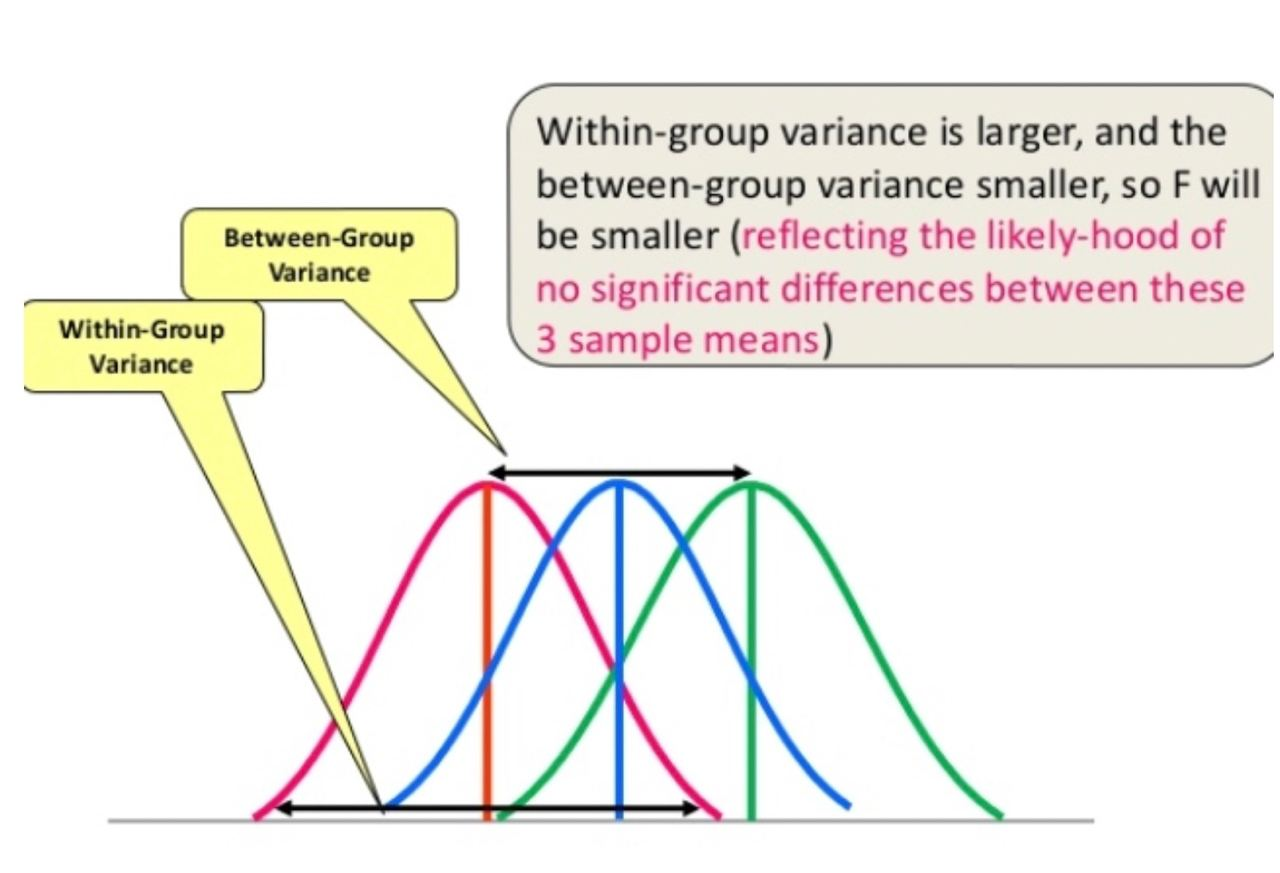

In [59]:
Image('screenshots/1.jpg', width=350, height=550)

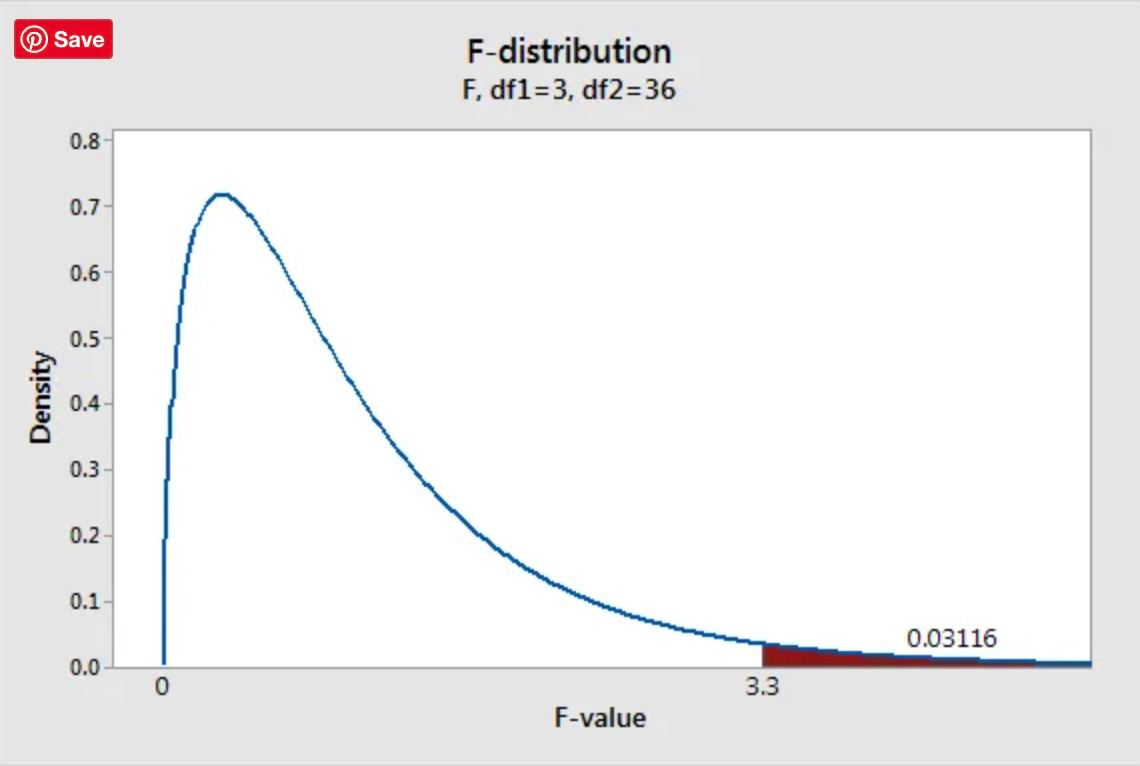

In [60]:
Image('screenshots/3.jpg', width=250, height=550)

### One-way Anova (F- test)
The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time (instead of conducting multiple pairwise t-tests, which would increase the chances of false positives.

F = Between group variability / Within group variability

Unlike the z and t-distributions, the F-distribution does not have any negative values because between and within-group variability are always positive due to squaring each deviation.

** Assumptions **
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

**Summary**
- Dependent variable: numerical
- Independent variable: categorical
- Sample: 3+
- Purpose: compare

In [22]:
def anova(*args, alpha = 0.05):
    H0 = 'There is no significant difference between the groups'
    H1 = 'There is a significant difference between the groups'
    
    F, pi_value = st.f_oneway(*args)
    print(f"H0 : {H0}")
    print(f"H1 : {H1}\n")
    
    print(
    f"""
    F-score: {(np.round(F,5))}    
    p_value: {pi_value}""")  
    
    n = 0
    for g in range(len(args)):
        n+= len(args[g])
        print(
    f"""    Group{g} mean : {np.round(np.mean(args[g]),2)}""")
        
    #pi_value_calc
#     k = len(args)
#     my_pi_value = 1 - st.f.cdf(F,  k-1, n-k)
    
    if pi_value < alpha:
        print(f"\nRejecting null hyphotheses: {H1}")
    else:
        print(f"\nNot enough evidence to reject Null Hyphothesis: {H0}")

In [23]:
a = st.norm.rvs(loc = 3,scale = 2, size = 10)
b = st.norm.rvs(loc = 3.1,scale = 2, size = 10)
c = st.norm.rvs(loc = 7, scale = 2, size = 10)
d = st.norm.rvs(loc = 17, scale = 3, size = 10)

In [24]:
anova(a,b,c)

H0 : There is no significant difference between the groups
H1 : There is a significant difference between the groups


    F-score: 30.40256    
    p_value: 1.2186908669805543e-07
    Group0 mean : 3.94
    Group1 mean : 2.11
    Group2 mean : 6.92

Rejecting null hyphotheses: There is a significant difference between the groups


### Two-Way Anova F-Test

Two Way F-test, extension of 1-way f-test, it is used when we have 2 independent variable and 2+ groups. 2-way F-test does not tell which variable is dominant. if we need to check individual significance then Post-hoc testing need to be performed.

##### Example

In [25]:
df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")
df_anova2.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In our crop yield experiment, we can test three hypotheses using two-way ANOVA:

H0:There is no difference in average yield for any fertilizer type.	
H1:There is a difference in average yield by fertilizer type.

H0:There is no difference in average yield at either planting density.	
H1: There is a difference in average yield by planting density.

H0:The effect of one independent variable on average yield does not depend on the effect of the other independent variable (a.k.a. no interaction effect).	
H1: There is an interaction effect between planting density and fertilizer type on average yield.

In [26]:
model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 3, 16) =  4.112, p =  0.0243


,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


Interpreting the result:

Following are the p-values for each of the factors in the output:

The fertilizer p-value  < 0.05
The Watering p-value  < 0.03
The Fertilizer * Watering: p-value > 0.3
    
The p-values for water and sun turn out to be less than 0.05 which implies that the means of both the factors possess a statistically significant effect on plant height. The p-value for the interaction effect (0.904053) is greater than 0.05 which depicts that there is no significant interaction effect between fertilizer frequency and watering frequency.

# Proportion Tests

### 1-sample t-test for proportion (Chi-squared goodness-of-fit)

**Summary**
- Dependent variable: categorical
- Sample: 1 - sample
- Purpose: compare 


Proportion problems are never t-test problems - z-distribution should always be used! However, you need to check that np0 and n(1-p0}) are both greater than 10, where n is your sample size and p0 is your hypothesized population proportion.
The assumptions underlying the t-test only strictly hold when the individual data values are sampled from a normal distribution. Proportions are limited to values between 0 and 1, while values taken from a normal distribution can be any real number.


**Assumptions**
- Random -> The sample must be a random sample from the entire population
- Normal -> The sample must reflect the distribution of the underlying population.
    For these tests a good rule of thumb is that:
        Given a sample size of n
        Given a sample proportion of p
        Then both np and n(1-p) must be at least 10

- Independent-> The sample must be independent - for these tests, a good rule of thumb is that the sample size is less than 10% of the total population.

Compare the proportion in a sample to an expected value

In [27]:
def one_sample_z_test_for_proportions(success_cases, n, population_p, tail = 'two', alpha = 0.05):
    z_score, pi_value = proportions_ztest(count=success_cases, nobs= n, value=population_p)
    
    # manual calculations
    p_hat = success_cases/n
    my_z_score = (p_hat - population_p)/ np.sqrt(p_hat *(1-p_hat)/(n))
    my_pi_value = st.norm.cdf(min(-z_score, z_score))*2
    
    if z_score != my_z_score or pi_value != my_pi_value:
        print("Z-score or p-value calculation Error...")
    
    if n*p_hat < 10 or n*(1-p_hat) <10:
        print("Sample not normal")
        return
            
    if tail == 'one':
        if p_hat > population_p:
            H0 = 'Sample population <= population population'
            H1 = 'Sample population > population population'
        else:
            H0 = 'Sample population >= population population'
            H1 = 'Sample population < population population'
            
        pi_value = st.norm.cdf(min(-z_score, z_score))
        

    elif tail == 'two':
        H0 = 'Sample population = population population'
        H1 = 'Sample population != population population'
    
    
    print(f"H0 : {H0}")
    print(f"H1 : {H1}\n")
    
    print(f"""Hyphothesized population population: {population_p}
    Sample population: {np.round(p_hat,2)}
    z-score: {np.round(z_score,5)}    
    p_value: {pi_value}    
    
    """)    
        
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

In [28]:
success_cases = 410
n = 500
population_p = 0.8
one_sample_z_test_for_proportions(success_cases, n, population_p, tail = 'one', alpha = 0.05)

H0 : Sample population <= population population
H1 : Sample population > population population

Hyphothesized population population: 0.8
    Sample population: 0.82
    z-score: 1.16405    
    p_value: 0.12220177493249235    
    
    
Not enough evidence to reject Null Hyphothesis: Sample population <= population population


### 2-sample t-test for proportion | Chi-square for homogeneity

**Summary**
- Dependent variable: categorical
- Sample: 2-sample
- Purpose: compare 

Here we have two samples, defined by a proportion, and we want to see if we can make an assertion about whether the overall proportions of one of the underlying populations is greater than / less than / different to the other.

From one population we sampled 500 tests and found 410 passed
From the other population, we sampled 400 tests and found 379 passed
We use a 2-sample z-test to check if the sample allows us to accept or reject the null hypothesis

In [29]:
def two_sample_z_test_for_proportions(sample_success1, n1, sample_success2, n2, tail = "two",  alpha = 0.05):    
    successes = np.array([sample_success1, sample_success2])
    samples = np.array([n1, n2])
    
    #my calculations
    
    p_hat1 = sample_success1/n1
    p_hat2 = sample_success2/n2
    p = (sample_success1 + sample_success2) / (n1 + n2)

    z_score, pi_value = proportions_ztest(count=successes, nobs=samples)

    my_z_score = (p_hat1-p_hat2) / np.sqrt(p * (1-p) * (1/n1 + 1/n2))
    my_pi_value = st.norm.cdf(min(-my_z_score, my_z_score)) *2
    if np.round(z_score, 5) != np.round(my_z_score,5) or np.round(pi_value,5) != np.round(my_pi_value,5):
        print("T-score or p-value calculation Error...")
    
    if n1*p_hat1 < 10 or n1*(1-p_hat1) <10 or n2*p_hat2 <10 or n2*(1-p_hat2)< 10:
        print("Sample not normal")
        return
    
    if tail == 'one':
        if p_hat1 > p_hat2:
            H0 = 'A proportion <= B proportion'
            H1 = 'A proportion > B proportion'
        else:
            H0 = 'A mean >= B mean'
            H1 = 'A mean < B mean'
            
        pi_value = pi_value/2
        

    elif tail == 'two':
        H0 = 'A proportion = B proportion'
        H1 = 'A proportion != B proportion'
    
    #Note that to find a two-tailed test p-value we simply multiply the p-value of the one-tailed p-value by two.
    print(f"H0 : {H0}")
    print(f"H1 : {H1}\n")
    
    print(f"""
    Group 1 proportion: {np.round(p_hat1,2)}
    Group 2 proportion: {np.round(p_hat2,2)}
    t-score: {np.round(z_score,5)}    
    p_value: {pi_value}    
       
    """)    
        
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

In [30]:
sample_success1 = 410
n1 = 500
sample_success2 = 379
n2 = 400
two_sample_z_test_for_proportions(sample_success1, n1, sample_success2, n2, tail = "one",  alpha = 0.05)

H0 : A mean >= B mean
H1 : A mean < B mean


    Group 1 proportion: 0.82
    Group 2 proportion: 0.95
    t-score: -5.78025    
    p_value: 3.729537030039318e-09    
       
    
Rejecting null hyphotheses: A mean < B mean


In [31]:
two_sample_z_test_for_proportions(sample_success1, n1, sample_success2, n2, tail = "two",  alpha = 0.05)

H0 : A proportion = B proportion
H1 : A proportion != B proportion


    Group 1 proportion: 0.82
    Group 2 proportion: 0.95
    t-score: -5.78025    
    p_value: 7.459074060078635e-09    
       
    
Rejecting null hyphotheses: A proportion != B proportion


# Chi-square test for independence (Pearson's chi-square)

**Summary**
- Dependent variable: categorical
- Sample: 1-sample-two-measurement
- Purpose: find relationship

**Assumptions**
- Observations used in the calculation of the contingency table are independent.
- 25 or more examples in each cell of the contingency table.

The chi-squared test is essentially always a one-sided test. Here is a loose way to think about it: the chi-squared test is basically a 'goodness of fit' test. Sometimes it is explicitly referred to as such, but even when it's not, it is still often in essence a goodness of fit. For example, the chi-squared test of independence on a 2 x 2 frequency table is (sort of) a test of goodness of fit of the first row (column) to the distribution specified by the second row (column), and vice versa, simultaneously. Thus, when the realized chi-squared value is way out on the right tail of it's distribution, it indicates a poor fit, and if it is far enough, relative to some pre-specified threshold, we might conclude that it is so poor that we don't believe the data are from that reference distribution.

If we were to use the chi-squared test as a two-sided test, we would also be worried if the statistic were too far into the left side of the chi-squared distribution. This would mean that we are worried the fit might be too good. This is simply not something we are typically worried about.

In [32]:
def chi_square_test(data, alpha = 0.05):
    stat, pi_value, dof, expected = st.chi2_contingency(data, correction=False)
    
    if type(data) == pd.core.frame.DataFrame:
        data = data.values
        
    # my calculations
    my_stat =sum([(o-e)**2/e for o,e in zip(np.array(data.flat),  np.array(expected.flat))])
    
    n_rows= contingency_table.shape[0]
    n_columns=contingency_table.shape[1]
    ddof= (n_rows-1) * (n_columns-1)
    
    my_pi_value = 1 - st.chi2.cdf(stat, df = dof)
        
    if np.round(stat, 5) != np.round(my_stat,5) or np.round(pi_value,5) != np.round(my_pi_value,5):
        print("Chi square stat or p-value calculation Error...")
    
    
    # testing
    H0 = "There is no relationship between 2 categorical variables"
    H1 = "There is statistically significant relationship between 2 categorical variables" 
    
    print(f"""
    Chi-square score: {np.round(stat,5)}    
    p_value: {pi_value}    
       
    """)    
    
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

##### Examples

In [33]:
df_chi = pd.read_csv('/Users/arpiharutyunyan/Desktop/Jupyter_Files/Learning/Stats/csvs/chi_square_test.csv')
df_chi.rename(columns = {"Like Shopping? ": "Shopping"}, inplace = True)
contingency_table=pd.crosstab(df_chi["Gender"],df_chi["Shopping"])
contingency_table

Shopping,No,Yes
Gender,,
Female,2,3
Male,2,2


In [34]:
chi_square_test(contingency_table)


    Chi-square score: 0.09    
    p_value: 0.7641771556220945    
       
    
Not enough evidence to reject Null Hyphothesis: There is no relationship between 2 categorical variables


***

In [35]:
conv_a = 20
conv_b = 35
clicks_a = 500
clicks_b = 520

data = np.array([[conv_a, clicks_a - conv_a],
                    [conv_b, clicks_b - conv_b]])

In [36]:
chi_square_test(data)


    Chi-square score: 3.72609    
    p_value: 0.05356860460300237    
       
    
Not enough evidence to reject Null Hyphothesis: There is no relationship between 2 categorical variables


#### Alternative Solution

In [37]:
converted = np.array([conv_a, conv_b])
clicks = np.array([clicks_a,clicks_b])

chisq, pvalue, table = proportion.proportions_chisquare(converted, clicks)
print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =3.726, pvalue = 0.054


# Fisher's exact test

Fisher's exact test of independence is used when you have two nominal variables and you want to see whether the proportions of one variable are different depending on the value of the other variable.

Fisher's exact test is preferable to the chi-squared test because it is an exact test. The chi-squared test should be particularly avoided if there are few observations (e.g. less than 10) for individual cells.

In [38]:
def fisher_test(data, alpha = 0.05):
    odd_ratio, pi_value = st.fisher_exact(data)
    
    # testing
    H0 = "There is no relationship between 2 categorical variables"
    H1 = "There is statistically significant relationship between 2 categorical variables" 
    
    print(f"""p_value: {np.round(pi_value,3)}""")    
    
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

In [39]:
fisher_test(data, alpha = 0.05)

p_value: 0.071
Not enough evidence to reject Null Hyphothesis: There is no relationship between 2 categorical variables


# Pearson's correlation test

**Summary**
- Both variables: numerical 
- Sample: one-sample-two-measures
- Purpose: find relationship

**Asumptions**
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.
    
Regression Analysis is interested in finding the equation describing the relationship of the variables.
Pearson's correlation test, on the other hand, is just testing whether there is significant correlation between dependent and independent variables (no matter positive or negative). 

In [40]:
def pearson_correlation_test(x,y, alpha = 0.05):
    corr, pi_value = st.pearsonr(x, y)
    H0 = "The correlation coefficient is not significantly different from 0"
    H1 = "There is statistically significant correlation between two variables" 
    
    print(f"""
    Correlation coefficient: {np.round(corr,5)}    
    p_value: {pi_value}    
    """)  
        
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

In [41]:
x = np.random.rand(100)
y = -x * 13- 729

In [42]:
pearson_correlation_test(x,y, alpha = 0.05)


    Correlation coefficient: -1.0    
    p_value: 0.0    
    
Rejecting null hyphotheses: There is statistically significant correlation between two variables


# Normality checks

## K-S test (Kolmogorov-Smirnov)
The purpose of the test is to test for differences in the shape of two sample distributions or to compare a sample distribution to a known distribution (such as normal distribution).

Test statistics D is the maximum absolute difference between two cumulative distribution functons (cdfs). 

- The null hypothesis (Ho): the two dataset values are from the same continuous distribution. 
- The alternative hypothesis (Ha): these two datasets are from different continuous distributions. 

In [43]:
def ks_test(dist1, dist2, alpha = 0.05):
    
    d_stat, p_val = kstest(dist1, dist2)  

    H0 = "Two dataset values are from the same continuous distribution."
    H1 = "Two datasets are from different continuous distributions." 

    if p_val < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

In [44]:
norm_dist1 = np.random.normal(size = 50)
norm_dist2 = np.random.normal(loc = 3, scale = 5, size = 50)
ks_test(norm_dist1, norm_dist2)

Rejecting null hyphotheses: Two datasets are from different continuous distributions.


In [45]:
# standardizing the normal distibution with mean = 3 and std = 5
norm_dist3 = (norm_dist2 - np.mean(norm_dist2))/np.std(norm_dist2)
ks_test(norm_dist1, norm_dist3)

Not enough evidence to reject Null Hyphothesis: Two dataset values are from the same continuous distribution.


In [46]:
ks_test(norm_dist1, 'norm')

Not enough evidence to reject Null Hyphothesis: Two dataset values are from the same continuous distribution.


In [47]:
ks_test(norm_dist1, 'uniform')

Rejecting null hyphotheses: Two datasets are from different continuous distributions.


## Shapiro-Wilk Test & D’Agostino’s K^2 Test 

**Assumptions**
Observations in each sample are independent and identically distributed (iid).

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [48]:
def normality_check(data, alpha = 0.05):
    H0 =  'the sample has a Gaussian distribution.'
    H1 = 'the sample does not have a Gaussian distribution.\n\n'
    
    print(f"\nH0: {H0}")
    print(f"H1: {H1}")

    
    print("*** Kolmogorov-Smirnov Test ***")
    stat, p = kstest(data, "norm")  
    print(f"\tP-value: {p}")

    if p < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}\n")
    
    
    print("*** Shapiro-Wilk Test ***")
    stat, p = st.shapiro(data)
    print(f"\tP-value: {p}")

    if p < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}\n")
    
    
    print("*** D’Agostino’s K^2 Test ***")
    stat, p = st.normaltest(data)
    print(f"\tP-value: {p}")
    if p < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}\n")

In [68]:
data = np.random.normal(size = 100) 
normality_check(data)


H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.


*** Kolmogorov-Smirnov Test ***
	P-value: 0.3899091433926247
Not enough evidence to reject Null Hyphothesis: the sample has a Gaussian distribution.

*** Shapiro-Wilk Test ***
	P-value: 0.01513462234288454
Rejecting null hyphotheses: the sample does not have a Gaussian distribution.


*** D’Agostino’s K^2 Test ***
	P-value: 0.015837180757259952
Rejecting null hyphotheses: the sample does not have a Gaussian distribution.




In [69]:
data = np.random.exponential(size = 100)
normality_check(data)


H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.


*** Kolmogorov-Smirnov Test ***
	P-value: 1.893266289911125e-24
Rejecting null hyphotheses: the sample does not have a Gaussian distribution.


*** Shapiro-Wilk Test ***
	P-value: 3.601164089150899e-10
Rejecting null hyphotheses: the sample does not have a Gaussian distribution.


*** D’Agostino’s K^2 Test ***
	P-value: 7.090230699093316e-14
Rejecting null hyphotheses: the sample does not have a Gaussian distribution.




# Test for Homoscedasticity 
No assumption of normality

- H0: the variances are equal across all samples (homoscedasticity holds).
- H1: the variances are NOT equall across all samples.

In [70]:
def variance_check(dist1, dist2, alpha = 0.05):
    H0 = 'the variances are equal across all samples (homoscedasticity holds).'
    H1 = 'the variances are NOT equall across all samples.'
        
    stat, pi_value = st.levene(dist1, dist2) 
    
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}\n")

In [71]:
dist1 = np.random.normal(size = 50)
dist2 = np.random.normal(loc = 3, scale = 5, size = 50)

In [72]:
variance_check(dist1, dist2)

Rejecting null hyphotheses: the variances are NOT equall across all samples.


# Wilcoxon test
Wilcoxon Rank Sum Test does not assume known distributions, it does not deal with parameters, and therefore we call it a non-parametric test. Whereas the null hypothesis of the two-sample t test is equal means, the null hypothesis of the Wilcoxon test is taken as equal medians.

- H0: The medians of the distributions doesn't differ from each other.
- H1: The medians of the distributions differ statistically from each other.

In [73]:
def wilcoxon_test(dist1, dist2, alpha = 0.05):
    H0 = 'the medians are equal across all samples.'
    H1 = 'the medians are NOT equall across all samples.'
        
    stat, pi_value = wilcoxon(dist1, dist2) 
    
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}\n")

In [74]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

In [75]:
wilcoxon_test(dist1, dist2, alpha = 0.05)

Rejecting null hyphotheses: the medians are NOT equall across all samples.


In [76]:
wilcoxon_test(data1, data2, alpha = 0.05)

Not enough evidence to reject Null Hyphothesis: the medians are equal across all samples.

